# pyBKT Model Tutorial

This is a tutorial that explores the basic features of pyBKT, ranging from model creation, fitting, prediction, evaluation and crossvalidation. We will be using the skills contained within the Cognitive Tutor and 2009-2010 Assistments datasets to demonstrate these features.

In [1]:
# Install pyBKT from pip!
# !pip install pyBKT

# Import all required packages including pyBKT.models.Model!
import numpy as np
import pandas as pd
from pyBKT.models import Model
import matplotlib.pyplot as plt

### Basic Model Creation and Evaluation

Initialize the model with an optional seed and number of fit initializations. Note that the Model constructor supports many more parameters such as the model variant (which can be modified at fit time), whether to parallelize computation, and more.

In [2]:
# Note that the seed chosen is so we can consistently
# replicate the results and avoid as much randomness
# as possible.
model = Model(seed = 42, num_fits = 1)

Fetch Assistments and CognitiveTutor data to the local disk. We will be using these datasets, but you can use any that you see fit when you use pyBKT. The data formats accepted by pyBKT are comma separated and tab separated files (note that pyBKT will automatically infer which is passed in). Note that the correctness is given by -1 (no response), 0 (incorrect), or 1 (correct).

In [ ]:
model.fetch_dataset('https://raw.githubusercontent.com/CAHLR/pyBKT-examples/master/data/as.csv', '.')
model.fetch_dataset('https://raw.githubusercontent.com/CAHLR/pyBKT-examples/master/data/ct.csv', '.')

We open the given datasets and explore them before using them to fit BKT models using pyBKT. Note that the column names describing the student ID, the problem name, the response's correctness and skill name all differ between the two datasets.

In [2]:
ct_df = pd.read_csv('ct.csv', encoding = 'latin')
print(ct_df.columns)
ct_df.head(5)

Index(['Unnamed: 0', 'Row', 'Anon Student Id', 'Problem Hierarchy',
       'Problem Name', 'Problem View', 'Step Name', 'Step Start Time',
       'First Transaction Time', 'Correct Transaction Time', 'Step End Time',
       'Step Duration (sec)', 'Correct Step Duration (sec)',
       'Error Step Duration (sec)', 'Correct First Attempt', 'Incorrects',
       'Hints', 'Corrects', 'KC(Default)', 'Opportunity(Default)'],
      dtype='object')


,Unnamed: 0,Row,Anon Student Id,Problem Hierarchy,Problem Name,Problem View,Step Name,Step Start Time,First Transaction Time,Correct Transaction Time,Step End Time,Step Duration (sec),Correct Step Duration (sec),Error Step Duration (sec),Correct First Attempt,Incorrects,Hints,Corrects,KC(Default),Opportunity(Default)
0,1576,1927,745Yh,"Unit RATIO-PROPORTION, Section RATIO-PROPORTION-2",RATIO2-001,1,SimplifiedNumeratorQuantity1,2006-11-14 10:18:00.0,2006-11-14 10:18:05.0,2006-11-14 10:18:05.0,2006-11-14 10:18:05.0,5.00000,5.00000,NaN,1,0,0,1,Calculate unit rate,1
1,1580,1931,745Yh,"Unit RATIO-PROPORTION, Section RATIO-PROPORTION-2",RATIO2-001,1,SimplifiedNumeratorQuantity2,2006-11-14 10:18:11.0,2006-11-14 10:18:17.0,2006-11-14 10:18:34.0,2006-11-14 10:18:34.0,23.00000,NaN,23.00000,0,1,0,1,Calculate unit rate,2
2,1596,1947,745Yh,"Unit RATIO-PROPORTION, Section RATIO-PROPORTION-2",RATIO2-012,1,SimplifiedNumeratorQuantity1,2006-11-14 10:50:52.0,2006-11-14 10:50:57.0,2006-11-14 10:51:11.0,2006-11-14 10:51:11.0,18.00000,NaN,18.00000,0,1,0,1,Calculate unit rate,3
3,1597,1948,745Yh,"Unit RATIO-PROPORTION, Section RATIO-PROPORTION-2",RATIO2-012,1,SimplifiedNumeratorQuantity2,2006-11-14 10:51:11.0,2006-11-14 10:51:14.0,2006-11-14 10:51:14.0,2006-11-14 10:51:14.0,3.00000,3.00000,NaN,1,0,0,1,Calculate unit rate,4
4,1612,1963,745Yh,"Unit RATIO-PROPORTION, Section RATIO-PROPORTION-2",RATIO2-054,1,SimplifiedNumeratorQuantity2,2006-11-28 09:53:43.0,2006-11-28 09:53:47.0,2006-11-28 09:53:56.0,2006-11-28 09:53:56.0,13.00000,NaN,13.00000,0,1,0,1,Calculate unit rate,5


In [4]:
as_df = pd.read_csv('as.csv', encoding = 'latin', low_memory = False)
print(as_df.columns)
as_df.head(5)

Index(['order_id', 'assignment_id', 'user_id', 'assistment_id', 'problem_id',
       'original', 'correct', 'attempt_count', 'ms_first_response',
       'tutor_mode', 'answer_type', 'sequence_id', 'student_class_id',
       'position', 'type', 'base_sequence_id', 'skill_id', 'skill_name',
       'teacher_id', 'school_id', 'hint_count', 'hint_total', 'overlap_time',
       'template_id', 'answer_id', 'answer_text', 'first_action',
       'bottom_hint', 'opportunity', 'opportunity_original'],
      dtype='object')


,order_id,assignment_id,user_id,assistment_id,problem_id,original,correct,attempt_count,ms_first_response,tutor_mode,...,hint_count,hint_total,overlap_time,template_id,answer_id,answer_text,first_action,bottom_hint,opportunity,opportunity_original
0,33022537,277618,64525,33139,51424,1,1,1,32454,tutor,...,0,3,32454,30799,NaN,26,0,NaN,1,1.00000
1,33022709,277618,64525,33150,51435,1,1,1,4922,tutor,...,0,3,4922,30799,NaN,55,0,NaN,2,2.00000
2,35450204,220674,70363,33159,51444,1,0,2,25390,tutor,...,0,3,42000,30799,NaN,88,0,NaN,1,1.00000
3,35450295,220674,70363,33110,51395,1,1,1,4859,tutor,...,0,3,4859,30059,NaN,41,0,NaN,2,2.00000
4,35450311,220674,70363,33196,51481,1,0,14,19813,tutor,...,3,4,124564,30060,NaN,65,0,0.00000,3,3.00000


We can fit a simple BKT model with the `fit` method for the Model class. In this case, we will fit a BKT model to every skill in the Cognitive Tutor dataset separately. Note that when skill(s) are not specified, it trains a separate model on all skills by default.

We can either specify a data path (location of a file) or the Pandas DataFrame containing the data.

In [5]:
model.fit(data_path = 'ct.csv')

We can train on multiple skills specified by a list of skill names or a 
REGEX match for each skill using the `skills` parameter. We demonstrate the usage of that below. In this case, we fit on all strings containing fraction.

In [6]:
model.fit(data_path = 'ct.csv', skills = ".*fraction.*")
print("Fitted Skills:\n%s" % '\n'.join(model.coef_.keys()))

Fitted Skills:
Plot non-terminating improper fraction
Plot terminating proper fraction
Calculate part in proportion with fractions
Calculate total in proportion with fractions


Evaluate on the trained skills for any test data located in a Pandas DataFrame or in a file. In this case, we will just use training data, so this will display the training error. Note that the default metric displayed is RMSE. pyBKT supports AUC, RMSE, and accuracy
as metrics by default.

However, you can define your own custom metric as well!

In [7]:
# Evaluate with the default RMSE then specify AUC.
model.fit(data_path = 'ct.csv')
training_rmse = model.evaluate(data = ct_df)
training_auc = model.evaluate(data_path = "ct.csv", metric = 'auc')
print("Training RMSE: %f" % training_rmse)
print("Training AUC: %f" % training_auc)

Training RMSE: 0.454048
Training AUC: 0.705809


In [8]:
# We can even define our own metric!
def mae(true_vals, pred_vals):
    """ Calculates the mean absolute error. """
    return np.mean(np.abs(true_vals - pred_vals))

training_mae = model.evaluate(data_path = 'ct.csv', metric = mae)
print("Training MAE: %f" % training_mae)

Training MAE: 0.412945


### Model Prediction

pyBKT can return predictions on a test set given a Pandas DataFrame or a file conaining test data. If pyBKT is asked for predictions on skills for which it has not trained a model, it will output a best effort guess of 0.5 for both the correct and state predictions.

We will be using the training dataset again for testing purposes.

In [9]:
# Note again that the REGEX expression below trains BKT models on all
# skills containing the word fraction!
model.fit(data_path = 'ct.csv', skills = ".*fraction.*")
preds = model.predict(data_path = 'ct.csv')
preds[['Anon Student Id', 'KC(Default)', 'Correct First Attempt', 
       'correct_predictions', 'state_predictions']].head(5)

,Anon Student Id,KC(Default),Correct First Attempt,correct_predictions,state_predictions
773,0I891Gg,Plot non-terminating improper fraction,0,0.49577,0.64162
774,0I891Gg,Plot imperfect radical,0,0.50000,0.50000
775,0I891Gg,Plot terminating proper fraction,0,0.51712,0.73496
776,0I891Gg,Plot pi,1,0.50000,0.50000
777,0I891Gg,Plot terminating proper fraction,1,0.46534,0.59943


In [10]:
# Let's sanity check that we have only trained on the skills that we 
# specified in the call to fit! Note that while it is possible for a 
# BKT prediction to be 0.5 exactly, it is unlikely.
preds[preds['correct_predictions'] != 0.5]['KC(Default)'].unique()

array(['Plot non-terminating improper fraction',
       'Plot terminating proper fraction',
       'Calculate part in proportion with fractions',
       'Calculate total in proportion with fractions'], dtype=object)

In [11]:
# Let's manually calculate the RMSE of the correct predictions 
# and ensure that it is the same as a call to the evaluate function.
def rmse(y_true, y_pred):
    """ Returns the root-mean squared error. """
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

# Filter out the data for which we did not train!
preds_filtered = preds[preds['KC(Default)'].str.contains('fraction')]
manual_training_rmse = rmse(preds_filtered['Correct First Attempt'],
                            preds_filtered['correct_predictions'])
manual_training_rmse

0.4405999318808203

In [12]:
# We use model.evaluate to accomplish the same thing!
# You should receive an RMSE that is identical to the above
# manually calculated RMSE.
model.evaluate(data = ct_df)

0.44059993188082097

### Model Cross-Validation and Variants

Crossvalidation is offered as a blackbox function similar to a combination of fit and evaluate that accepts a particular number of folds, a seed, and a metric (either one of the 3 provided that are 'rmse', 'auc' or 'accuracy' or a custom Python function taking 2 arguments). Similar arguments for the model types, data path/data, and skill names are accepted as with the fit function.

In [13]:
# Note that folds is an optional parameter as well as the model 
# variant, seed, and crossvalidated metric.
# By default, we crossvalidate on all skills separately.
model.crossvalidate(data_path = 'ct.csv', folds = 5)

,rmse
skill,
Plot non-terminating improper fraction,0.48498
Plot imperfect radical,0.43571
Plot terminating proper fraction,0.49804
Plot pi,0.46075
Plot whole number,0.29058
Plot decimal - thousandths,0.47254
Calculate unit rate,0.48287
Calculate part in proportion with fractions,0.42721
Calculate total in proportion with fractions,0.42430


We explore all the model variants offered within pyBKT for one particular skill (Calculations with Similar Figures) using cross-validation since it provides a much better evaluation of true model performance during test time than the training loss!

In [14]:
# Try this with a different skill or metric by replacing the lines below.
skill = 'Calculations with Similar Figures'
metric = 'auc'

simple_cv = model.crossvalidate(data = as_df, skills = skill, 
                                metric = metric)
simple_cv

,auc
skill,
Calculations with Similar Figures,0.59662


The multigs model fits a different guess/slip rate for each class. Note that by default, for the CognitiveTutor data, the guess and slip classes will be specified by the template_id. pyBKT will be able to infer the column names for AS/CT type datasets, but you can specify a custom column mapping (discussed in later cells).

In [15]:
multigs_cv = model.crossvalidate(data_path = 'as.csv', skills = skill,
                                 multigs = True, metric = metric)
multigs_cv

,auc
skill,
Calculations with Similar Figures,0.63834


The multilearn model fits a different learn rate (and forget rate if enabled) rate for each class specified. Note that the learn classes are specified by the template_id column by default for the Assistments dataset.

In [16]:
multilearn_cv = model.crossvalidate(data_path = 'as.csv', skills = skill,
                                    multilearn = True, forgets = True, 
                                    metric = metric)
multilearn_cv

,auc
skill,
Calculations with Similar Figures,0.62712


The multilearn model fits a different learn (and forget if enabled) rate for each class, and the multipair model generates a different learn rate based on each consecutive pair of classes. 

In [17]:
# The multiprior model generates different priors based on the first 
# response of each student.
multiprior_cv = model.crossvalidate(data_path = 'as.csv', skills = skill,
                                    multiprior = True, metric = metric,
                                    folds = 3)
multipair_cv = model.crossvalidate(data_path = 'as.csv', skills = skill,
                                   multipair = True, metric = metric,
                                   folds = 3)
pd.concat([multiprior_cv, multipair_cv], axis = 0)

,auc
skill,
Calculations with Similar Figures,0.60332
Calculations with Similar Figures,0.59662


The best performing models are typically those that combine several useful variants such as the multilearn and multiguess/slip class variants. We will enable the forgets parameter as well. Try testing with other skills and see whether this holds true for the general case.

In [18]:
# We combine the fifth parameter, forgets, with the previous multilearn
# and multiguess/slip models for a combo model.
combo_cv = model.crossvalidate(data_path = 'as.csv', skills = skill,
                               forgets = True, multilearn = True, 
                               multigs = True, metric = metric)
combo_cv

,auc
skill,
Calculations with Similar Figures,0.61708


### Save Combination Model to `pickle` File

In [176]:
defaults = {
    'order_id': 'custom_order', 
    'skill_name': 'custom_skill', 
    'correct': 'custom_answer',
    'user_id': 'custom_student_id',
    # 'multigs': 'custom_gs_classes',
}

columns = [
    # 'Row',
    'Anon Student Id',
    'KC(Default)',
    'Correct First Attempt',
    # 'Problem Name'
]
my_df = ct_df[columns]
my_df.columns = [
    # 'order_id',
    'user_id',
    'skill_name',
    'correct',
    # 'custom_gs_classes'
]
# my_df.columns = [
#     'custom_order',
#     'custom_student_id',
#     'custom_skill',
#     'custom_answer',
#     # 'custom_gs_classes'
# ]
my_df['skill_name'] += ' (Custom)'
my_df.head(5)

,user_id,skill_name,correct
773,0I891Gg,Plot non-terminating improper fraction (Custom),0
774,0I891Gg,Plot imperfect radical (Custom),0
775,0I891Gg,Plot terminating proper fraction (Custom),0
776,0I891Gg,Plot pi (Custom),1
777,0I891Gg,Plot terminating proper fraction (Custom),1


In [149]:
columns = ['Row', 'Anon Student Id', 'KC(Default)', 'Correct First Attempt', 'Problem Name']
my_df2 = ct_df[columns]
my_df2['KC(Default)'] += ' (Custom)'
my_df2.head(5)

,Row,Anon Student Id,KC(Default),Correct First Attempt,Problem Name
773,112149,0I891Gg,Plot non-terminating improper fraction (Custom),0,RATIONAL1-014
774,112151,0I891Gg,Plot imperfect radical (Custom),0,RATIONAL1-041
775,112156,0I891Gg,Plot terminating proper fraction (Custom),0,RATIONAL1-104
776,112157,0I891Gg,Plot pi (Custom),1,RATIONAL1-122
777,112159,0I891Gg,Plot terminating proper fraction (Custom),1,RATIONAL1-180


In [177]:
model = Model(seed=42, num_fits=1)

model.fit(
    data=my_df,
    # defaults=defaults,
    # skills=my_df["custom_skill"].unique().tolist(),
)

In [ ]:
model.evaluate(
    data=my_df,
    # defaults=defaults,
)

In [28]:
model.crossvalidate(
    data = ct_df,
    forgets = True,
    multilearn = True,
    multigs = True,
    metric = "auc",
    folds = 5,
)

,auc
skill,
Plot non-terminating improper fraction,0.60222
Plot imperfect radical,0.62459
Plot terminating proper fraction,0.71187
Plot pi,0.63674
Plot whole number,0.69273
Plot decimal - thousandths,0.69422
Calculate unit rate,0.72158
Calculate part in proportion with fractions,0.62559
Calculate total in proportion with fractions,0.65920


In [100]:
ct_df.head(5)

,Unnamed: 0,Row,Anon Student Id,Problem Hierarchy,Problem Name,Problem View,Step Name,Step Start Time,First Transaction Time,Correct Transaction Time,...,Correct Step Duration (sec),Error Step Duration (sec),Correct First Attempt,Incorrects,Hints,Corrects,KC(Default),Opportunity(Default),correct_predictions,state_predictions
773,84051,112149,0I891Gg,"Unit RATIONAL-IRRATIONAL-NUMBERS, Section RATI...",RATIONAL1-014,1,RationalNumberline1,2006-09-07 09:02:46.0,2006-09-07 09:03:11.0,2006-09-07 09:03:27.0,...,NaN,41.00000,0,1,0,1,Plot non-terminating improper fraction,1,0.47740,0.40882
774,84053,112151,0I891Gg,"Unit RATIONAL-IRRATIONAL-NUMBERS, Section RATI...",RATIONAL1-041,1,RationalNumberline1,2006-09-07 09:03:59.0,2006-09-07 09:10:07.0,2006-09-07 09:13:55.0,...,NaN,596.00000,0,5,1,1,Plot imperfect radical,1,0.46024,0.06773
775,84058,112156,0I891Gg,"Unit RATIONAL-IRRATIONAL-NUMBERS, Section RATI...",RATIONAL1-104,1,RationalNumberline1,2006-09-07 09:16:53.0,2006-09-07 09:17:33.0,2006-09-07 09:17:35.0,...,NaN,42.00000,0,1,0,1,Plot terminating proper fraction,1,0.11793,0.00340
776,84059,112157,0I891Gg,"Unit RATIONAL-IRRATIONAL-NUMBERS, Section RATI...",RATIONAL1-122,1,RationalNumberline1,2006-09-07 09:17:41.0,2006-09-07 09:18:11.0,2006-09-07 09:18:11.0,...,30.00000,NaN,1,0,0,1,Plot pi,1,0.75629,0.71195
777,84061,112159,0I891Gg,"Unit RATIONAL-IRRATIONAL-NUMBERS, Section RATI...",RATIONAL1-180,1,RationalNumberline1,2006-09-07 09:18:29.0,2006-09-07 09:18:44.0,2006-09-07 09:18:44.0,...,15.00000,NaN,1,0,0,1,Plot terminating proper fraction,2,0.45643,0.00163


In [129]:
model

Model(parallel=True, num_fits=5, seed=42, defaults={'order_id': 'custom_order', 'skill_name': 'custom_skill', 'correct': 'custom_answer', 'user_id': 'custom_student_id', 'multigs': 'custom_gs_classes'})

In [123]:
my_df["custom_skill"].unique().tolist()

['Plot non-terminating improper fraction (Custom)',
 'Plot imperfect radical (Custom)',
 'Plot terminating proper fraction (Custom)',
 'Plot pi (Custom)',
 'Plot whole number (Custom)',
 'Plot decimal - thousandths (Custom)',
 'Calculate unit rate (Custom)',
 'Calculate part in proportion with fractions (Custom)',
 'Calculate total in proportion with fractions (Custom)',
 'Finding the intersection, Mixed (Custom)',
 'Finding the intersection, GLF (Custom)',
 'Finding the intersection, SIF (Custom)']

In [140]:
model.crossvalidate(
    data=my_df,
    metric="auc",
    defaults=defaults,
)

,auc
skill,
Plot non-terminating improper fraction (Custom),0.64076
Plot imperfect radical (Custom),0.63413
Plot terminating proper fraction (Custom),0.55914
Plot pi (Custom),0.58068
Plot whole number (Custom),0.53734
Plot decimal - thousandths (Custom),0.62505
Calculate unit rate (Custom),0.59534
Calculate part in proportion with fractions (Custom),0.67032
Calculate total in proportion with fractions (Custom),0.70914


In [19]:
preds = model.predict(data = ct_df)
preds[['Anon Student Id', 'KC(Default)', 'Correct First Attempt', 
       'correct_predictions', 'state_predictions']].head(5)

,Anon Student Id,KC(Default),Correct First Attempt,correct_predictions,state_predictions
773,0I891Gg,Plot non-terminating improper fraction,0,0.49900,0.32692
774,0I891Gg,Plot imperfect radical,0,0.32865,0.25476
775,0I891Gg,Plot terminating proper fraction,0,0.12006,0.00579
776,0I891Gg,Plot pi,1,0.82969,0.74094
777,0I891Gg,Plot terminating proper fraction,1,0.45654,0.00067


In [96]:
preds = model.predict(data = ct_df)
preds[['Anon Student Id', 'KC(Default)', 'Correct First Attempt', 
       'correct_predictions', 'state_predictions']]

,Anon Student Id,KC(Default),Correct First Attempt,correct_predictions,state_predictions
773,0I891Gg,Plot non-terminating improper fraction,0,0.47740,0.40882
774,0I891Gg,Plot imperfect radical,0,0.46024,0.06773
775,0I891Gg,Plot terminating proper fraction,0,0.11793,0.00340
776,0I891Gg,Plot pi,1,0.75629,0.71195
777,0I891Gg,Plot terminating proper fraction,1,0.45643,0.00163
...,...,...,...,...,...
2004,zt5vuLM,Calculate part in proportion with fractions,1,0.74707,0.73451
2005,zt5vuLM,Calculate total in proportion with fractions,1,0.68552,0.33393
2006,zt5vuLM,Calculate part in proportion with fractions,1,0.72118,0.73854
2007,zt5vuLM,Calculate total in proportion with fractions,1,0.70099,0.52609


In [ ]:
# model = Model()
# model.load("model.pkl")

pred = model.predict(
    data=pd.DataFrame(
        [
            {
                "Anon Student Id": "A0206262N",
                "KC(Default)": "Plot non-terminating improper fraction",
                "Correct First Attempt": 1,
                "Problem Name": "RATIONAL1-014",
            }
        ]
    )
)

pred.to_dict()[["correct_predictions", "state_predictions"]]

In [ ]:
pred = model.predict(
    data=pd.DataFrame(
        [
            {
                'custom_order': 1,
                'custom_student_id': 'A0206262N',
                'custom_skill': 'Plot non-terminating improper fraction (Custom)',
                'custom_answer': 1,
                'custom_gs_classes': 'RATIONAL1-014',
            }
        ]
    )
)

pred.to_dict()[["correct_predictions", "state_predictions"]]

In [161]:
model.save("model-custom.pkl")

### pyBKT Examples

In [163]:
builder_df = pd.read_csv("../pyBKT-examples/data/builder_train_preprocessed.csv")
builder_df

,user_id,skill_name,correct
0,1,7,1
1,7,82,0
2,7,82,0
3,7,82,0
4,7,82,0
...,...,...,...
407962,145,123,0
407963,145,123,1
407964,145,123,1
407965,145,123,1


In [411]:
defaults = {
    'order_id': '#', 
    'user_id': 'Student ID',
    'skill_name': 'Topic', 
    'correct': 'Correct',
    'multigs': 'Problem Name',
}

columns = [
    'Row',
    'Anon Student Id',
    'KC(Default)',
    'Correct First Attempt',
    'Problem Name'
]
my_df = ct_df[columns]
my_df.columns = defaults.values()
# topics = {skill: str(i) for i, skill in enumerate(my_df["Topic"].unique())}
# my_df["Topic"] = my_df["Topic"].replace(topics)
my_df['Topic'] += ' (Custom)'
my_df['Topic'] = my_df['Topic'].str.lower()
# ^[]\+$*()|? invalid characters
# -,./:;'"#{} valid characters
my_df.head(5)

,#,Student ID,Topic,Correct,Problem Name
773,112149,0I891Gg,plot non-terminating improper fraction (custom),0,RATIONAL1-014
774,112151,0I891Gg,plot imperfect radical (custom),0,RATIONAL1-041
775,112156,0I891Gg,plot terminating proper fraction (custom),0,RATIONAL1-104
776,112157,0I891Gg,plot pi (custom),1,RATIONAL1-122
777,112159,0I891Gg,plot terminating proper fraction (custom),1,RATIONAL1-180


In [403]:
import json
with open("topics.json", "w") as f:
    json.dump(topics, f, indent=2)
topics

{'plot non-terminating improper fraction': 'a',
 'plot imperfect radical': 'b',
 'plot terminating proper fraction': 'c',
 'plot pi': 'd',
 'plot whole number': 'e',
 'plot decimal - thousandths': 'f',
 'calculate unit rate': 'g',
 'calculate part in proportion with fractions': 'h',
 'calculate total in proportion with fractions': 'i',
 'finding the intersection, mixed': 'j',
 'finding the intersection, glf': 'k',
 'finding the intersection, sif': 'l'}

In [412]:
model2 = Model(seed=42, num_fits=20)

model2.fit(
    data=my_df,
    defaults=defaults,
    forgets=True,
)

preds = model2.predict(data=my_df)
preds.head()

ValueError: no matching skills

In [407]:
preds[preds["Student ID"] == "0I891Gg"].head()

,#,Student ID,Topic,Correct,Problem Name,correct_predictions,state_predictions
773,112149,0I891Gg,plot non-terminating improper fraction - custom,0,RATIONAL1-014,0.51126,0.65667
774,112151,0I891Gg,plot imperfect radical - custom,0,RATIONAL1-041,0.26632,0.28875
775,112156,0I891Gg,plot terminating proper fraction - custom,0,RATIONAL1-104,0.50248,0.67380
776,112157,0I891Gg,plot pi - custom,1,RATIONAL1-122,0.62650,0.67014
777,112159,0I891Gg,plot terminating proper fraction - custom,1,RATIONAL1-180,0.44970,0.54858


In [408]:
preds[preds["Student ID"] == "zt5vuLM"].head()

,#,Student ID,Topic,Correct,Problem Name,correct_predictions,state_predictions
1961,308759,zt5vuLM,plot imperfect radical - custom,0,RATIONAL1-184,0.26632,0.28875
1962,308761,zt5vuLM,plot whole number - custom,1,RATIONAL1-298,0.89792,0.91971
1963,308763,zt5vuLM,plot terminating proper fraction - custom,1,RATIONAL1-253,0.50248,0.67380
1964,308766,zt5vuLM,plot imperfect radical - custom,0,RATIONAL1-279,0.22740,0.22977
1965,308768,zt5vuLM,plot pi - custom,0,RATIONAL1-045,0.62650,0.67014


In [409]:
model2.predict(
    data=pd.DataFrame(
        [
            # {
            #     "Student ID": "zt5vuLM",
            #     "Topic": 0,
            #     "Correct": 0,
            #     "Problem Name": "RATIONAL1-221",
            # },
            {
                "Student ID": "0I891Gg",
                "Topic": "plot imperfect radical - custom",
                "Correct": 1,
                "Problem Name": "RATIONAL1-160",
            },
            {
                "Student ID": "0I891Gg",
                "Topic": "plot pi - custom",
                "Correct": 1,
                "Problem Name": "RATIONAL1-160",
            },
        ]
    )
)

,Student ID,Topic,Correct,Problem Name,correct_predictions,state_predictions
0,0I891Gg,plot imperfect radical - custom,1,RATIONAL1-160,0.26632,0.28875
1,0I891Gg,plot pi - custom,1,RATIONAL1-160,0.62650,0.67014


In [410]:
model2.save("model-custom.pkl")

### Model Parameter Initialization and Visualization

We can initialize any of the model parameters for a particular skill's BKT model before training using `model.coef_`. Similar to SciKit Learn, `model.coef_` is a way to initialize model parameters and view them after they are fitted.


In [19]:
# We initialize the prior parameter to 1e-3 for the Box and Whisker 
# skill.
#
# Note that if we are training a KT-IDEM (multiguess/slip) model,
# we need to have len(guesses) == len(slips) == # of G/S classes.
# Similarly, for multilearn models, you need len(forgets) == len(guesses)
# corresponding to the number of learn classes.
skill = 'Box and Whisker'

model.coef_ = {skill: {'prior': 1e-40}}
model.coef_

{'Box and Whisker': {'prior': 1e-40}}

In [20]:
# Train the model with the pre-initialized parameters.
model.fit(data_path = 'as.csv', skills = skill, multigs = True)
low_prior_auc = model.evaluate(data_path = 'as.csv', metric = 'auc')

# We can obtain the prior value by indexing into the model.coef_
# dictionary with the skill and parameter names. 
print("Fitted Prior Value: %f" % model.coef_[skill]['prior'])
print("Training AUC: %f" % low_prior_auc)

Fitted Prior Value: 0.000000
Training AUC: 0.655785


In [21]:
# Initialize the prior to be more reasonable.
model.coef_ = {skill: {'prior': 0.5}}
model.fit(data_path = 'as.csv', skills = skill, multigs = True)
normal_prior_auc = model.evaluate(data_path = 'as.csv', metric = 'auc')

# Print the fitted prior value and RMSE.
print("Fitted Prior Value: %f" % model.coef_[skill]['prior'])
print("Training AUC: %f" % normal_prior_auc)

Fitted Prior Value: 0.004951
Training AUC: 0.638635


We can visualize the parameters of our fitted model in a Pandas DataFrame once it has been fit. We can easily plot the learn, forget, guess, and slip rates for multilearn/forget and multiguess/slip models. 

In [22]:
model.fit(data_path = 'as.csv', skills = skill,
          forgets = True, multilearn = True, 
          multigs = True)
model.params()

value
skill           param   class          
Box and Whisker prior   default 0.65304
                learns  30059   0.59731
                        30060   0.64181
                        30799   0.53192
                        63446   0.60828
                        63447   0.56964
                        63448   0.51486
                guesses 30059   0.06871
                        30060   0.03370
                        30799   0.03845
                        63446   0.04668
                        63447   0.02071
                        63448   0.05630
                slips   30059   0.00431
                        30060   0.01190
                        30799   0.00662
                        63446   0.00917
                        63447   0.01479
                        63448   0.00707
                forgets 30059   0.17553
                        30060   0.16512
                        30799   0.14012
                        63446   0.19763
                        63447   0.17348
                        63448   0.26969

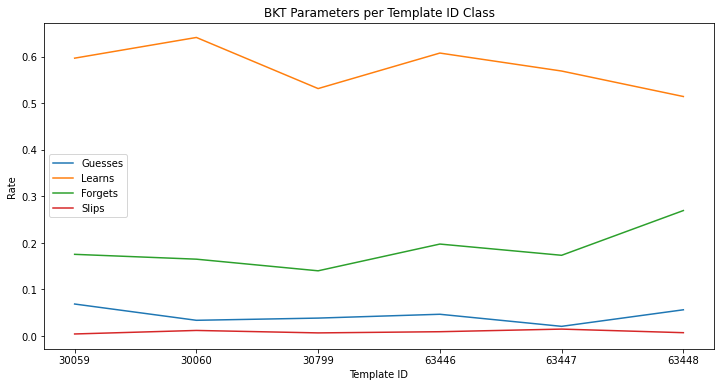

In [23]:
# We will get warnings for using indexing past lexsort. That's fine,
# and we will disable these warnings.
import warnings
warnings.simplefilter(action='ignore')

# Plot the learns, forgets, slips and guesses for each of the classes.
params = model.params()
plt.figure(figsize = (12, 6))
plt.plot(params.loc[(skill, 'guesses')], label = 'Guesses')
plt.plot(params.loc[(skill, 'learns')], label = 'Learns')
plt.plot(params.loc[(skill, 'forgets')], label = 'Forgets')
plt.plot(params.loc[(skill, 'slips')], label = 'Slips')
plt.xlabel('Template ID')
plt.ylabel('Rate')
plt.title('BKT Parameters per Template ID Class')
plt.legend();

### Extended Data and Model Configuration

Models can get excessively long, whether it's due to the number of model variants used, the number of folds/seed/metric for crossvalidation, data path length, etc.

We create a configuration dictionary that describes all the parameters we will pass in. Note that this is not a pyBKT feature, but actually just a Python feature that not many realize is very powerful!

In [24]:
config = {'multigs': True,
          'multilearn': True,
          'skills': ['Box and Whisker', 'Circle Graph'],
          'forgets': True,
          'metric': 'accuracy',
          'folds': 4,
          'seed': 42 * 42}
model.crossvalidate(data_path = 'as.csv', **config)

,accuracy
skill,
Circle Graph,0.67881
Box and Whisker,0.75615


For other non-Assistments/CogTutor style datasets, we will need to specify the
columns corresponding to each required column (i.e. the user ID, correct/incorrect). This is because pyBKT only supports the automatic inference of column names for the AS/CT datasets.

For that, we use a defaults dictionary or specify parameters for each model variant.

In [25]:
# Note that this means that the order_id specified by the column named
# custom_order in our custom dataset, the skill_name is specified by the 
# custom_skill column in our custom dataset, and so on.
defaults = {'order_id': 'custom_order', 
            'skill_name': 'custom_skill', 
            'correct': 'custom_answer',
            'user_id': 'custom_student_id'}

# This defaults dictionary can also contain columns specifying
# what columns correspond to the desired guess/slip classes, etc.
defaults['multigs'] = 'custom_gs_classes'

# Our final column mapping is:
defaults

{'order_id': 'custom_order',
 'skill_name': 'custom_skill',
 'correct': 'custom_answer',
 'user_id': 'custom_student_id',
 'multigs': 'custom_gs_classes'}

In [26]:
# We'll use this mapping with the modified CogTutor dataset with the names
# we chose for the columns.
#
# Note that Row is the order ID (order_id), KC(Default) is the 
# skill name (skill_name), Correct First Attempt is correct, and 
# Problem Name is the corresponding guess/slip class column.

columns = ['Row', 'Anon Student Id', 'KC(Default)', 
           'Correct First Attempt', 'Problem Name']
my_df = ct_df[columns]
my_df.columns = ['custom_order', 'custom_student_id',
                 'custom_skill', 'custom_answer',
                 'custom_gs_classes']
my_df['custom_skill'] += ' (Custom)'
my_df.head(5)

,custom_order,custom_student_id,custom_skill,custom_answer,custom_gs_classes
773,112149,0I891Gg,Plot non-terminating improper fraction (Custom),0,RATIONAL1-014
774,112151,0I891Gg,Plot imperfect radical (Custom),0,RATIONAL1-041
775,112156,0I891Gg,Plot terminating proper fraction (Custom),0,RATIONAL1-104
776,112157,0I891Gg,Plot pi (Custom),1,RATIONAL1-122
777,112159,0I891Gg,Plot terminating proper fraction (Custom),1,RATIONAL1-180


In [27]:
# We can crossvalidate/fit given these default column mappings.
model.crossvalidate(data = my_df, metric = 'auc',
                    defaults = defaults)

,auc
skill,
Plot non-terminating improper fraction (Custom),0.64389
Plot imperfect radical (Custom),0.64034
Plot terminating proper fraction (Custom),0.57167
Plot pi (Custom),0.57181
Plot whole number (Custom),0.51454
Plot decimal - thousandths (Custom),0.62338
Calculate unit rate (Custom),0.59671
Calculate part in proportion with fractions (Custom),0.67297
Calculate total in proportion with fractions (Custom),0.70334


### Sample Case Studies

In [28]:
# Question 1: Which model variant has the smallest training loss for 
# "Venn Diagram" in as.csv?
models = {}

model = Model(seed = 42, num_fits = 1)
model.fit(data_path="as.csv", skills="Venn Diagram")
models['simple'] = model.evaluate(data_path="as.csv")
model.fit(data_path="as.csv", skills="Venn Diagram", multilearn=True)
models['multilearn'] = model.evaluate(data_path="as.csv")
model.fit(data_path="as.csv", skills="Venn Diagram", multigs=True)
models['multigs'] = model.evaluate(data_path="as.csv")
model.fit(data_path="as.csv", skills="Venn Diagram", forgets=True)
models['forgets'] = model.evaluate(data_path="as.csv")
model.fit(data_path="as.csv", skills="Venn Diagram", forgets=True, 
          multigs = True)
models['multigs + forgets'] = model.evaluate(data_path="as.csv")
model.fit(data_path="as.csv", skills="Venn Diagram", forgets=True,
          multilearn = True)
models['multilearn + forgets'] = model.evaluate(data_path="as.csv")

df = pd.DataFrame(models.items())
df.columns = ['model type', 'RMSE']
df.set_index('model type')

,RMSE
model type,
simple,0.33123
multilearn,0.32947
multigs,0.33994
forgets,0.27899
multigs + forgets,0.31429
multilearn + forgets,0.26900


In [29]:
# Question 2: Which columns work the best for the multilearn skills
# below in ct.csv?

skills = ['Calculate unit rate',
          'Calculate part in proportion with fractions']
column_names = ["Anon Student Id", "Problem Hierarchy", "Problem Name", 
                "Problem View", "Step Name", "Correct First Attempt", 
                "Incorrects", "Hints", "Opportunity(Default)"]
model = Model(num_fits = 1)
for skill in skills:
  print("------------------")
  print("SKILL: %s" % skill)
  print("Basic:", model.crossvalidate(data_path="ct.csv", 
                                    skills=skill,
                                    metric = 'auc').iloc[0, 0])
  for i in column_names:
    print("%s:" % i, model.crossvalidate(data_path="ct.csv", 
                                              skills=skill, 
                                              multilearn=i,
                                              metric = 'auc').iloc[0, 0])

------------------
SKILL: Calculate unit rate
Basic: 0.5837764786829892
Anon Student Id: 0.49459172246448546
Problem Hierarchy: 0.5971043486112795
Problem Name: 0.5663236878564233
Problem View: 0.5909436516285229
Step Name: 0.585660656860788
Correct First Attempt: 0.6015851063825
Incorrects: 0.5911573172102874
Hints: 0.5954590325173081
Opportunity(Default): 0.5525605433701872
------------------
SKILL: Calculate part in proportion with fractions
Basic: 0.6751294025502157
Anon Student Id: 0.5062982974014325
Problem Hierarchy: 0.6727598074487379
Problem Name: 0.6750707793137418
Problem View: 0.6752029937597664
Step Name: 0.675423861266886
Correct First Attempt: 0.6755918707737391
Incorrects: 0.6744690164119496
Hints: 0.6763347902734308
Opportunity(Default): 0.6764641585131397


RMSE Improvement using Resp. Time: -0.001326


,mean learn rate
class,
less than 10s,0.12000
less than 20s,0.18328
less than 30s,0.18048
less than 40s,0.15806
less than 50s,0.17832
other,0.17500


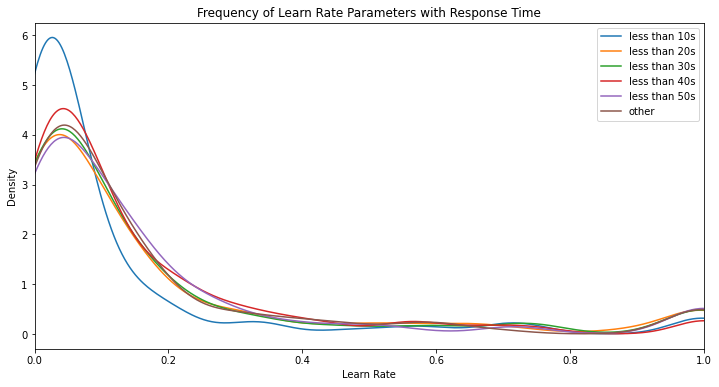

In [30]:
# Question 3: Does binned response time have an effect on the learn rate?
# Does it improve the RMSE of the model compared to the normal template_id
# based multilearn/guess?

as_df = pd.read_csv('as.csv', encoding = 'latin')
learn_maps = {0: 'less than 10s', 
              1: 'less than 20s', 
              2: 'less than 30s', 
              3: 'less than 40s', 
              4: 'less than 50s'}
as_df['resp_t'] = (as_df['ms_first_response'] // 10000) \
                  .map(learn_maps).fillna('other')
model.fit(data = as_df, multilearn = 'resp_t')
params_df = model.params().reset_index()
plt.figure(figsize = (12, 6))
params_df[params_df['param'] == 'learns'].groupby('class')['value'] \
                                         .plot.kde(bw_method=0.2)
plt.xlim((0, 1))
plt.legend()
plt.title('Frequency of Learn Rate Parameters with Response Time')
plt.xlabel('Learn Rate')

simple_rmse = model.crossvalidate(data = as_df)
resptime_combo_rmse = model.crossvalidate(data = as_df,
                                              multigs = 'resp_t',
                                              multilearn = 'resp_t')
normal_combo_rmse = model.crossvalidate(data = as_df,
                                        multigs = True,
                                        multilearn = True)
rmse_diff = (resptime_combo_rmse - normal_combo_rmse)['rmse'].mean()
print("RMSE Improvement using Resp. Time: %f" % rmse_diff)
params_df[params_df['param'] == 'learns'].groupby('class') \
                                         .mean()[['value']] \
                                         .rename(columns = {'value': 
                                                  'mean learn rate'})

### Summary

The following is a summary of most of the key features of BKT.

In [31]:
# Let's summarize.
def mae(true_vals, pred_vals):
    """ Calculates the mean absolute error. """
    return np.mean(np.abs(true_vals - pred_vals))

# This code fetches data, fits, predicts, evaluates and crossvalidates
# a BKT model on all skills in Cognitive Tutor. It uses the mean absolute
# error as the desired error metric.
model = Model(seed = 42, num_fits = 5)
model.fit(data_path = 'ct.csv')
preds_df = model.predict(data_path = 'ct.csv')
mae_error = model.evaluate(data_path = 'ct.csv', metric = mae)
cv_errors = model.crossvalidate(data_path = 'ct.csv', metric = mae)
model.fit(data_path = 'ct.csv')
params_df = model.params()
print("Training MAE: %f" % mae_error)
cv_errors

Training MAE: 0.412651


,mae
skill,
Plot non-terminating improper fraction,0.46776
Plot imperfect radical,0.38281
Plot terminating proper fraction,0.49291
Plot pi,0.42216
Plot whole number,0.16895
Plot decimal - thousandths,0.44682
Calculate unit rate,0.46540
Calculate part in proportion with fractions,0.36601
Calculate total in proportion with fractions,0.36145


### Roster

In [347]:
from pyBKT.models import Roster, StateType

r = Roster(
    students=["Alice", "0I891Gg"],
    skills=["0", "1"],
    model=model2,
)

In [348]:
print(r.get_state_type("0", "0I891Gg"))
print(r.get_mastery_prob("0", "0I891Gg"))

StateType.UNMASTERED
0.6600204455942147


In [350]:
print(r.get_state_type("1", "Alice"))
print(r.get_mastery_prob("1", "Alice"))

StateType.UNMASTERED
0.2891945164978828


In [351]:
r.skill_rosters

{'0': SkillRoster(2, '0', 0.95, False, Model(parallel=True, num_fits=20, seed=42, defaults={'user_id': 'Student ID', 'skill_name': 'Topic', 'correct': 'Correct', 'multigs': 'Problem Name', 'multilearn': 'Problem Name', 'multipair': 'Problem Name'})),
 '1': SkillRoster(2, '1', 0.95, False, Model(parallel=True, num_fits=20, seed=42, defaults={'user_id': 'Student ID', 'skill_name': 'Topic', 'correct': 'Correct', 'multigs': 'Problem Name', 'multilearn': 'Problem Name', 'multipair': 'Problem Name'}))}

In [296]:
from pyBKT.models import Roster, StateType
import numpy as np

# Create a backend pyBKT model and fit it on the CT data
model = Model()
model.fit(data_path = 'ct.csv')

# Create a Roster with two students, Jeff and Bob, who are participating in the roster
# for one skill (Calculate Unit Rate) using the pyBKT model above.
roster = Roster(students = ['Jeff', 'Bob'], skills = 'Calculate unit rate', model = model)

# Initial mastery state (prior) for Jeff, should be unmastered with low probability of mastery
# get_state_type returns whether a student has mastered the skill or not
# get_mastery_prob returns the probability a student has mastered the skill
print("Jeff's mastery (t = 0):", roster.get_state_type('Calculate unit rate', 'Jeff'))
print("Jeff's probability of mastery (t = 0):", roster.get_mastery_prob('Calculate unit rate', 'Jeff'))

# We can update Jeff's state by adding one or more responses to a particular skill. In this case,
# we observed a correct response for the one skill in the roster.
jeff_new_state = roster.update_state('Calculate unit rate', 'Jeff', 1)

# Check the updated mastery state and probability.
print("Jeff's mastery (t = 1):", roster.get_state_type('Calculate unit rate', 'Jeff'))
print("Jeff's probability of mastery (t = 1):", roster.get_mastery_prob('Calculate unit rate', 'Jeff'))

# We can update his state with multiple correct responses (ten of them).
roster.update_state('Calculate unit rate', 'Jeff', np.ones(10))

# After 10 consecutive correct responses, he should have mastered the skill.
print("Jeff's mastery (t = 11):", roster.get_state_type('Calculate unit rate', 'Jeff'))
print("Jeff's probability of mastery (t = 11):", roster.get_mastery_prob('Calculate unit rate', 'Jeff'))

# Programmatically check whether he has mastered the skill
if roster.get_state_type('Calculate unit rate', 'Jeff') == StateType.MASTERED:
    print("Jeff has mastered the skill!")
    
# We can update Bob's state with two correct responses.
roster.update_state('Calculate unit rate', 'Bob', np.ones(2))

# He should remain unmastered.
print("Bob's mastery (t = 2):", roster.get_state_type('Calculate unit rate', 'Bob'))
print("Bob's probability of mastery (t = 2):", roster.get_mastery_prob('Calculate unit rate', 'Bob'))

# We can print aggregate statistics for mastery and correctness.
print("Both students' probabilites of correctness:", roster.get_correct_probs('Calculate unit rate'))
print("Both students' probabilites of mastery:", roster.get_mastery_probs('Calculate unit rate'))

# Add a new student, Sarah.
roster.add_student('Calculate unit rate', 'Sarah')

# Update Sarah's state with a sequence of correct and incorrect responses.
sarah_new_state = roster.update_state('Calculate unit rate', 'Sarah', np.array([1, 0, 1, 0, 1, 1, 1]))

# Print Sarah's correctness and mastery probability.
print("Sarah's correctness probability:", sarah_new_state.get_correct_prob())
print("Sarah's mastery probability:", sarah_new_state.get_mastery_prob())

# Delete Bob from the roster.
roster.remove_student('Calculate unit rate', 'Bob')

# Reset student's state (i.e. latent and observable).
roster.reset_state('Calculate unit rate', 'Jeff')

# Jeff should be back to the initial prior as the mastery probability and should be unmastered.
print("Jeff's mastery (t' = 0):", roster.get_state_type('Calculate unit rate', 'Jeff'))
print("Jeff's probability of mastery (t' = 0):", roster.get_mastery_prob('Calculate unit rate', 'Jeff'))

Jeff's mastery (t = 0): StateType.UNMASTERED
Jeff's probability of mastery (t = 0): 0.010222621940854748
Jeff's mastery (t = 1): StateType.UNMASTERED
Jeff's probability of mastery (t = 1): 0.0901824324908311
Jeff's mastery (t = 11): StateType.MASTERED
Jeff's probability of mastery (t = 11): 0.9911137477595623
Jeff has mastered the skill!
Bob's mastery (t = 2): StateType.UNMASTERED
Bob's probability of mastery (t = 2): 0.2109054892370994
Both students' probabilites of correctness: {'Jeff': 0.8621073753267414, 'Bob': 0.5718107455985235}
Both students' probabilites of mastery: {'Jeff': 0.9911137477595623, 'Bob': 0.2109054892370994}
Sarah's correctness probability: 0.7228121155735172
Sarah's mastery probability: 0.61674043128584
Jeff's mastery (t' = 0): StateType.UNMASTERED
Jeff's probability of mastery (t' = 0): 0.010222621940854748
